## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

dataset = pd.read_csv("titanic.csv")
sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [25]:

print("Основна статистична інформація про числові змінні")
print(dataset.describe())
print("\nРозмір датасету")
print(dataset.shape)
print("\nТип змінних і кількість данних по кожній змінній")
print(dataset.info())



Основна статистична інформація про числові змінні
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Розмір датасету
(891, 12)

Тип

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [26]:
missing = dataset.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [27]:
# У колонці Age у нас пропущено 177 значень
# У колонці Cabin у нас є пропущено 687 значень
# У колонці Emabarked у нас пропущено тільки 2 значення

Ваші висновки:

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



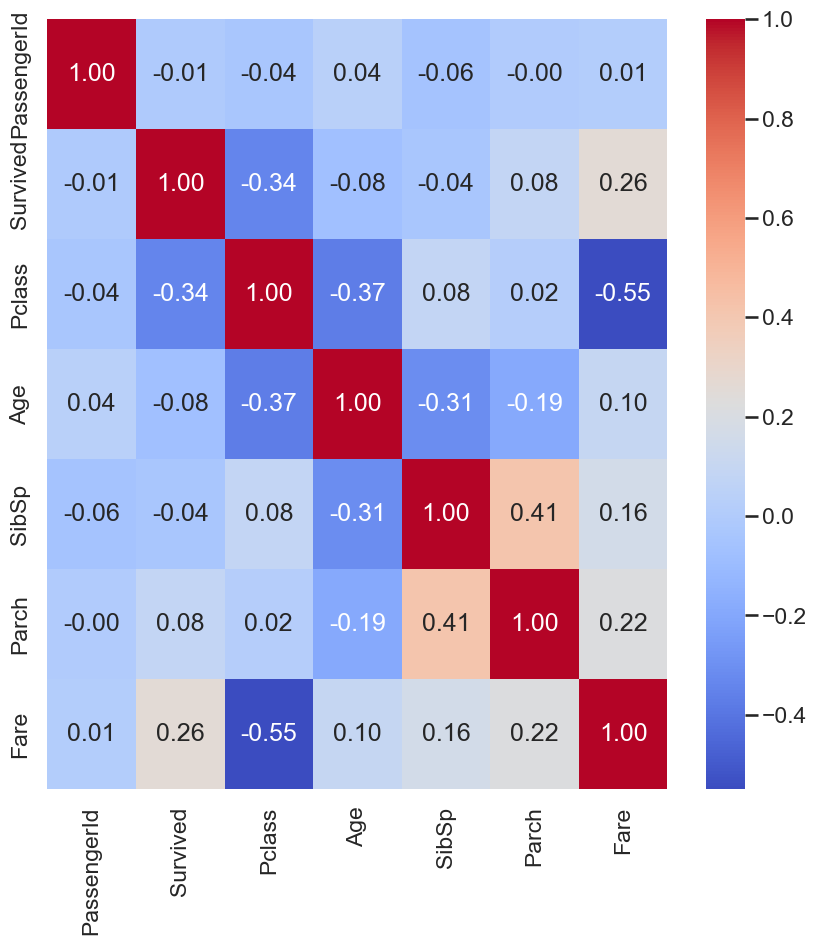

In [28]:

number = dataset.select_dtypes(include=['float','int'])
pearson = number.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title
plt.show()

In [29]:
# Значення, близьке до 1, вказує на сильну позитивну кореляцію між двома змінними
# Значення, близьке до -1, вказує на сильну негативну кореляцію між двома змінними
# Значення, близьке до 0, означає відсутність кореляції між двома змінними

# 1.Кореляція між Pclass і Survived, вказує на те, 
#   що пасажири вищих класів мали дещо вищий рівень виживання
# 2.Кореляція між Fare  і Survived, 
#   тобто пасажири, які заплатили вищий тариф, мали менше шансів вижити
# 3.Кореляція між SibSp і Parch, означає, що пасажири з більшою кількістю 
#    братів і сестер або подружжяна борту, як правило, мали великий вплив на шанс вижити



Ваші висновки:

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [30]:
def missing_group(ds,colum,group_colum):
    ds[colum] = ds.groupby(group_colum)[colum].transform(lambda x:  x.fillna(x.median()))
    return ds
filds = missing_group(dataset,'Age',['Pclass','Sex'])
missing = dataset.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [31]:
#Я замінив пропущені значення у колонці Age,оскільки ця колонка буде сильно впливати на відсоток виживаємості, на медіану двох інших колонок.

Ваші висновки:

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





C:\Users\prosi\AppData\Local\Temp\ipykernel_13216\1175413099.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sur_age_bin = dataset.groupby('Age_bin')['Survived'].value_counts()


<Figure size 500x500 with 0 Axes>

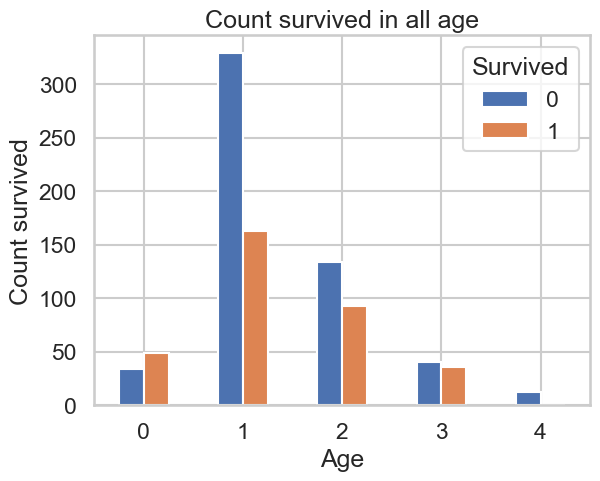

In [32]:
Age_bins = [0,16,32,48,64,80]
labales = [0,1,2,3,4]
dataset['Age_bin'] = pd.cut(dataset['Age'], bins=Age_bins, labels=labales, right=False)

plt.figure(figsize=(5,5))
sur_age_bin = dataset.groupby('Age_bin')['Survived'].value_counts()
sur_age_bin.unstack().plot(kind='bar')
plt.title('Count survived in all age')
plt.xlabel('Age')
plt.ylabel('Count survived')
plt.xticks(rotation=0)
plt.show()

In [33]:
# На даному графіку я можу зробити висновок що група 1(від 16 до 32 років) процент виживаємості і смерті є найбільшим серед всіх, причому смертність є більшою за виживаємість.
# Також можна замітити що у групі 4(від 64 до 80) немає виживших, або їх дуже мало

Ваші висновки:

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

Chi2: 80.17393102947467
P_value: 2.816616687453629e-17


C:\Users\prosi\AppData\Local\Temp\ipykernel_13216\3557021907.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sur_fare_bin = dataset.groupby('Fare_bin')['Survived'].value_counts()


<Figure size 1000x600 with 0 Axes>

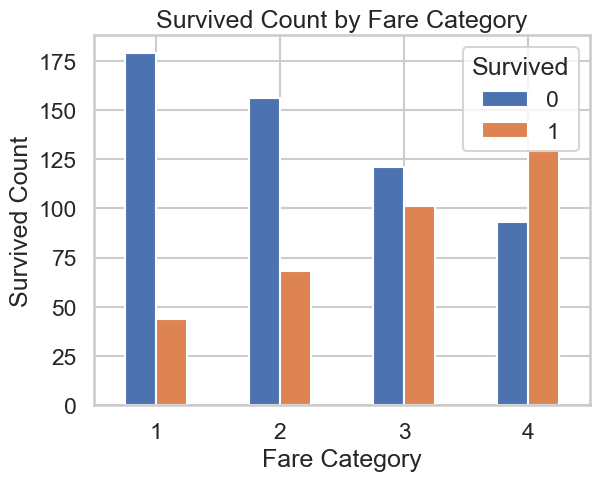

In [34]:
dataset['Fare_bin'] = pd.qcut(dataset['Fare'], q=4,labels=['1','2','3','4'])

chi2, p_value, _, _ = chi2_contingency(pd.crosstab(dataset['Fare_bin'], dataset['Survived']))
print("Chi2:", chi2)
print("P_value:", p_value)

plt.figure(figsize=(10, 6))

sur_fare_bin = dataset.groupby('Fare_bin')['Survived'].value_counts()
sur_fare_bin.unstack().plot(kind='bar')
plt.xlabel('Fare Category')
plt.ylabel('Survived Count')
plt.title('Survived Count by Fare Category')
plt.xticks(rotation=0)
plt.show()

In [35]:
#Результати критерію Хі-квадрат показали, що є статистично значуща залежність між  ціною квитка та виживанням пасажирів, оскільки значення p-value менше за обране рівень значущості (зазвичай 0,05).

Ваші висновки:

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [36]:
dataset['Family_size'] = dataset['Parch'] + dataset['SibSp']
dataset['Alone'] = (dataset['Family_size'] == 0).astype(int)
print(dataset[['Family_size', 'Alone']])

     Family_size  Alone
0              1      0
1              1      0
2              0      1
3              1      0
4              0      1
..           ...    ...
886            0      1
887            0      1
888            3      0
889            0      1
890            0      1

[891 rows x 2 columns]


In [37]:
#Я створив нові змінні Family_size і Alone, і як видно якщо Family_size = 1, то Alone = 0, і навпаки

Ваші висновки:

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [38]:
dataset = dataset.drop('PassengerId' , axis =1)
dataset = dataset.drop('Name' , axis =1)
dataset = dataset.drop('Ticket' , axis =1)
dataset = dataset.drop('Cabin' , axis =1)


In [39]:
#Я видаляю колонки PassengerId,Name і Ticket тому що вони є нерелевантними, а колока Cabin містить багато пропущених значень

Ваші висновки:

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [40]:
dataset_copy = pd.read_csv("titanic copy.csv")

dataset["Title"] = dataset_copy["Name"].apply(lambda name: name.split(".")[0].split(",")[-1].strip())

titles_map = {title: ind for ind, title in enumerate(dataset['Title'].unique())}
sex_map = {"female": 1, "male": 0}
embarked_map = {"S": 1, "Q": 2, "C": 3}

dataset["Title"] = dataset["Title"].map(titles_map)
dataset["Sex"] = dataset["Sex"].map(sex_map)
dataset["Embarked"] = dataset["Embarked"].map(embarked_map)

print(dataset[['Sex','Embarked','Title']])


     Sex  Embarked  Title
0      0       1.0      0
1      1       3.0      1
2      1       1.0      2
3      1       1.0      1
4      0       1.0      0
..   ...       ...    ...
886    0       1.0      5
887    1       1.0      2
888    1       1.0      2
889    0       3.0      0
890    0       2.0      0

[891 rows x 3 columns]


In [41]:
#Я перетворив вказанні зміні на числові значення

Ваші висновки:

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



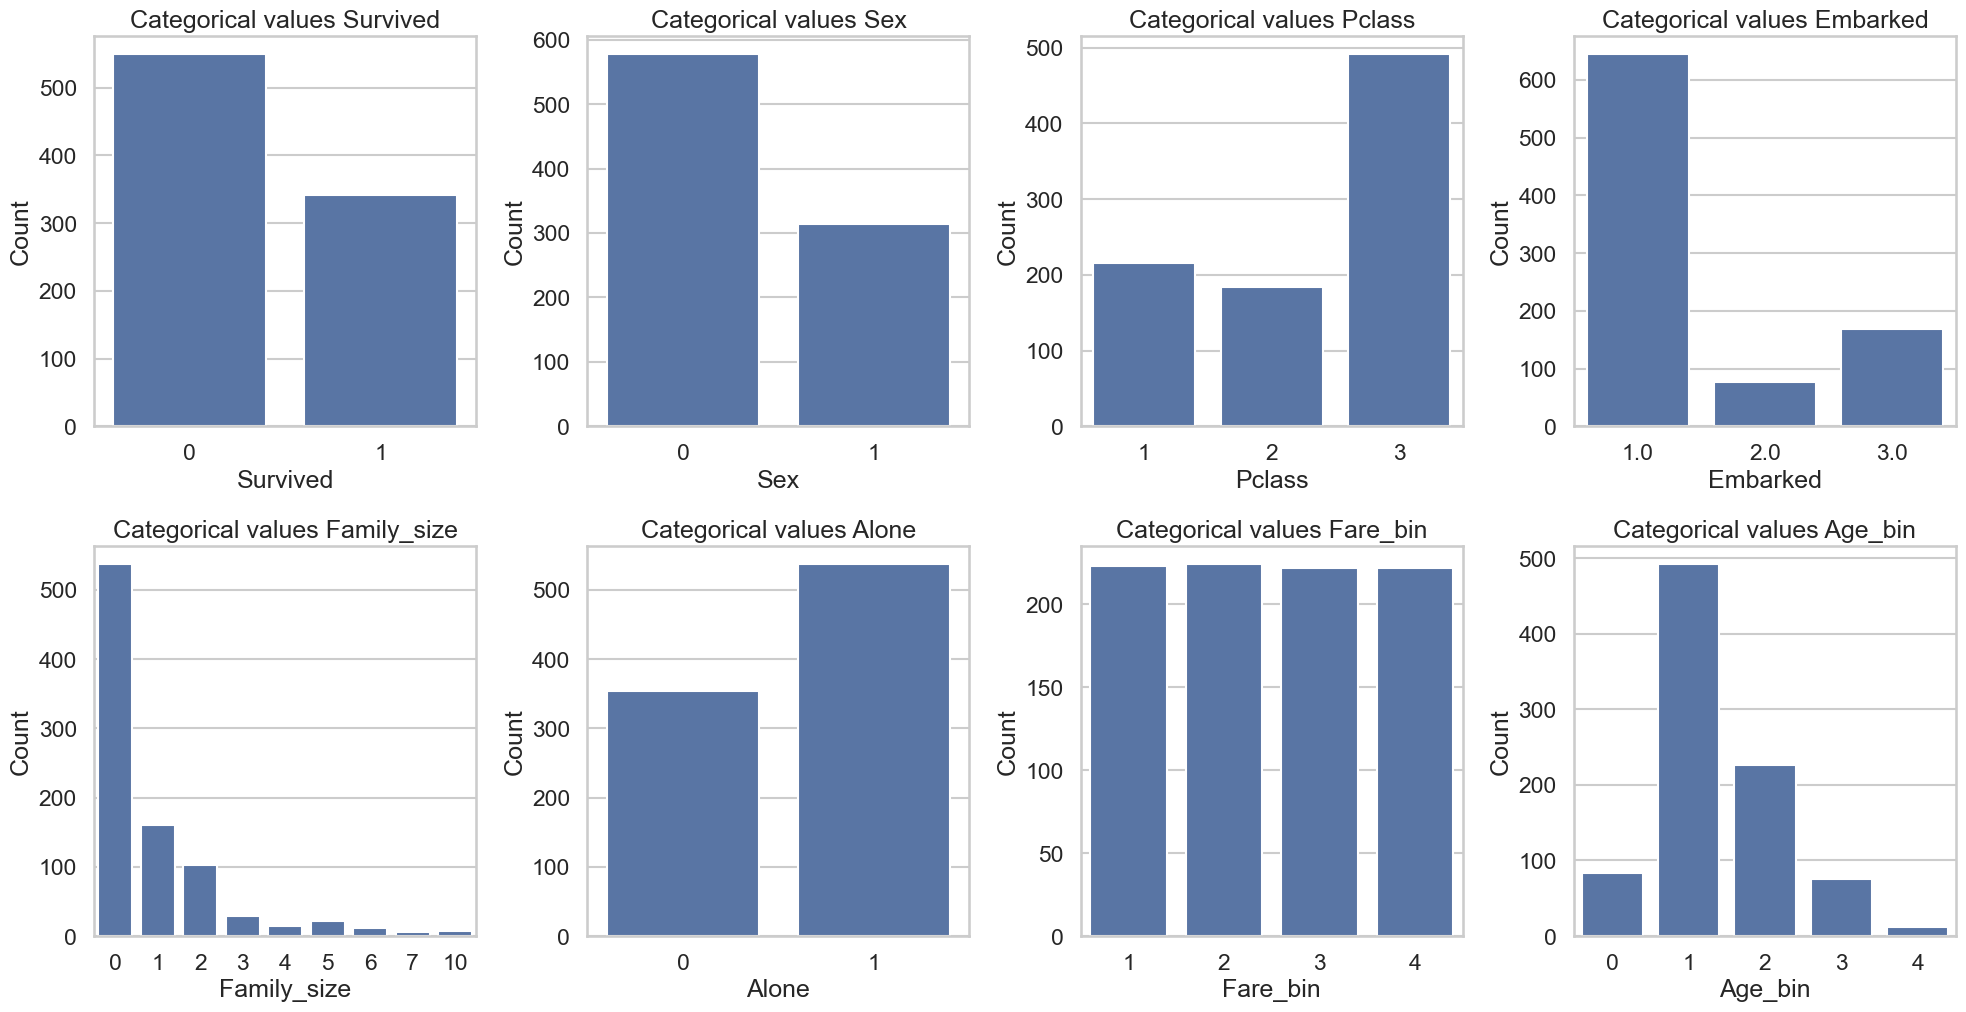

In [42]:
categotical = ['Survived','Sex','Pclass','Embarked','Family_size','Alone','Fare_bin','Age_bin']
plt.figure(figsize=(20,20))
for i,var in enumerate(categotical,1):
    plt.subplot(4,4,i)
    sns.countplot(x=var,data=dataset)
    plt.title(f'Categorical values {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()    



In [43]:
categorical = ['Survived', 'Sex', 'Pclass', 'Embarked', 'Family_size', 'Alone', 'Fare_bin', 'Age_bin']
for var in categorical:
    count_data = dataset[var].value_counts()
    print(f"Дані за категорією '{var}':")
    for category, count in count_data.items():
        print(f"{category} = {count}")
    print()


Дані за категорією 'Survived':
0 = 549
1 = 342

Дані за категорією 'Sex':
0 = 577
1 = 314

Дані за категорією 'Pclass':
3 = 491
1 = 216
2 = 184

Дані за категорією 'Embarked':
1.0 = 644
3.0 = 168
2.0 = 77

Дані за категорією 'Family_size':
0 = 537
1 = 161
2 = 102
3 = 29
5 = 22
4 = 15
6 = 12
10 = 7
7 = 6

Дані за категорією 'Alone':
1 = 537
0 = 354

Дані за категорією 'Fare_bin':
2 = 224
1 = 223
3 = 222
4 = 222

Дані за категорією 'Age_bin':
1 = 492
2 = 227
0 = 83
3 = 76
4 = 12



Ваші висновки:

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

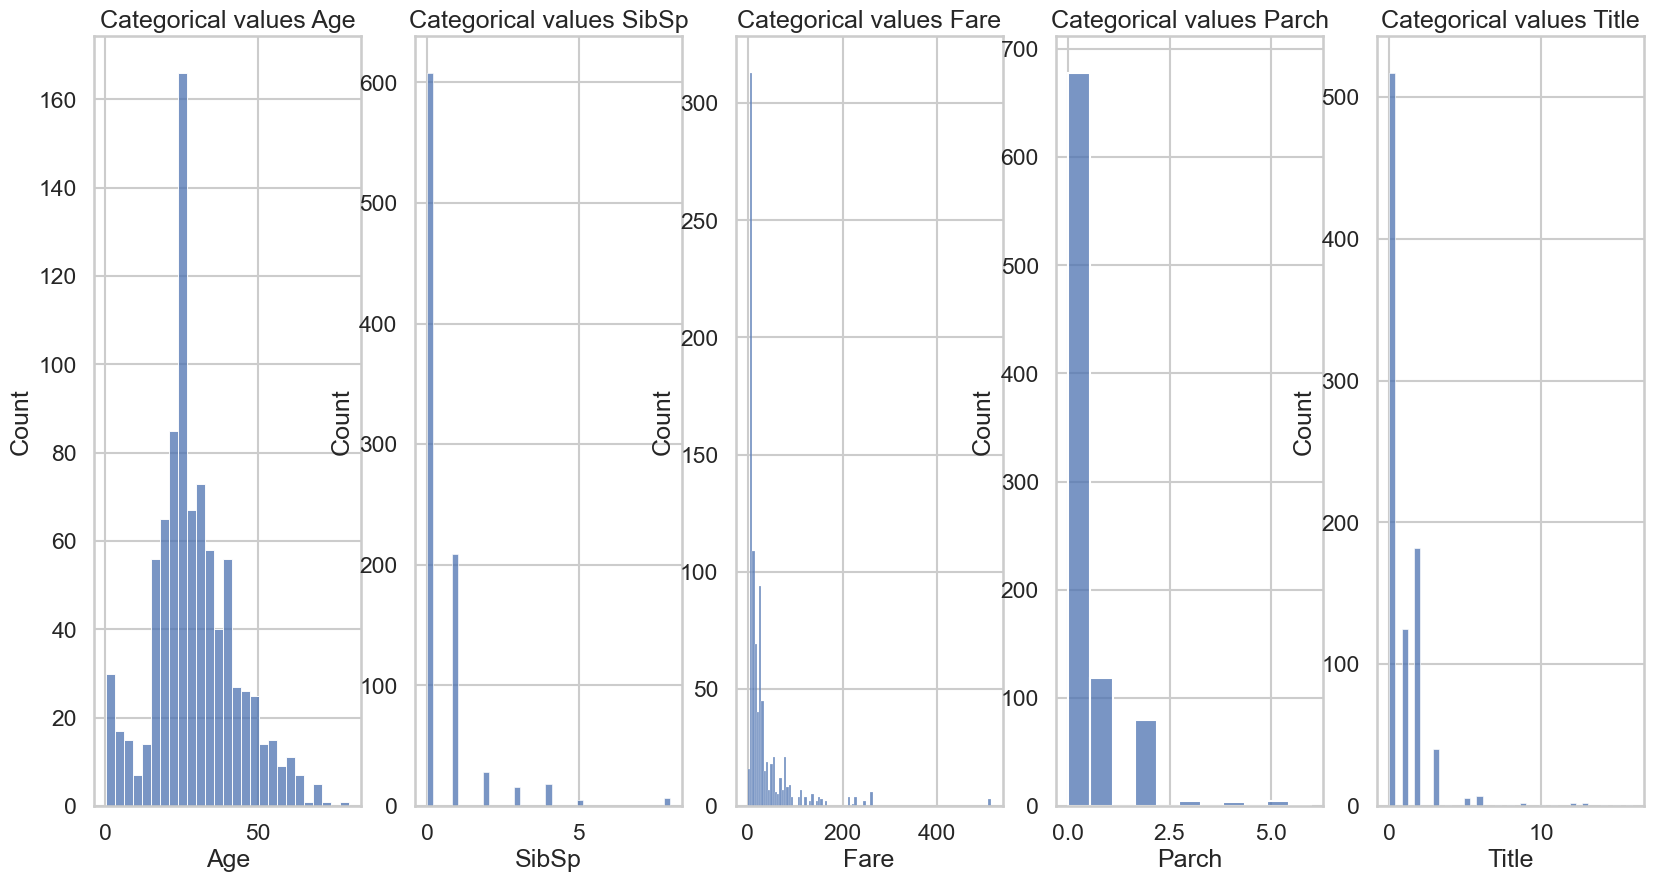

In [44]:
numbers = ['Age','SibSp','Fare','Parch','Title']
plt.figure(figsize=(20,10))
for i,var in enumerate(numbers,1):
    plt.subplot(1,len(numbers),i)
    sns.histplot(dataset[var])
    plt.title(f'Categorical values {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.show()   

Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

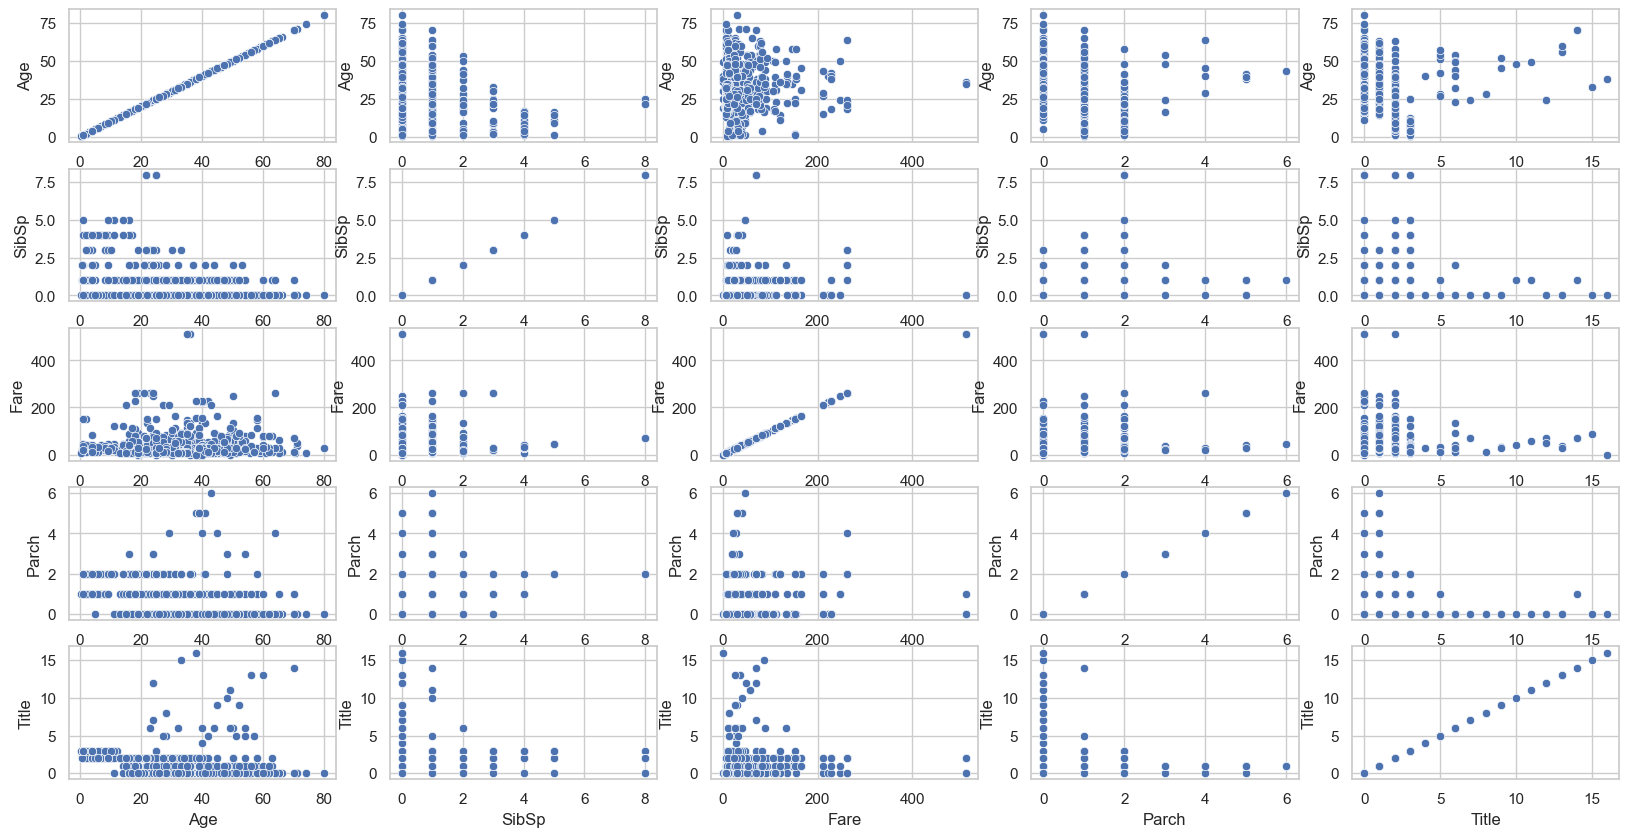

In [49]:
numbers = ['Age','SibSp','Fare','Parch','Title']
fig, ax = plt.subplots(nrows=len(numbers), ncols=len(numbers), figsize=(20, 10))
sns.set(style="whitegrid")

for variable_row in numbers:
    for variable_col in numbers:
        sns.scatterplot(x=variable_col, y=variable_row, data=dataset, ax=ax[numbers.index(variable_row), numbers.index(variable_col)])


plt.show()

Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.